In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_data.csv.xlsx to student_data.csv.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd

df = pd.read_excel('student_data.csv.xlsx')

print(df.head())



   student_id     name  marks  attendance (%)  logins
0         101    Sahil     85              95     120
1         102   Prasad     45              60      40
2         103    Yash      32              58      20
3         104    Suraj     90              98     150
4         105  Pratham     38              55      10


In [7]:
df.rename(columns={'attendance (%)': 'attendance'}, inplace=True)
df.dropna(inplace=True)  # Remove rows with nulls
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  10 non-null     int64 
 1   name        10 non-null     object
 2   marks       10 non-null     int64 
 3   attendance  10 non-null     int64 
 4   logins      10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None


In [8]:
def categorize(row):
    if row['marks'] < 50 or row['attendance'] < 60:
        return 'Struggling'
    else:
        return 'Top'

df['category'] = df.apply(categorize, axis=1)


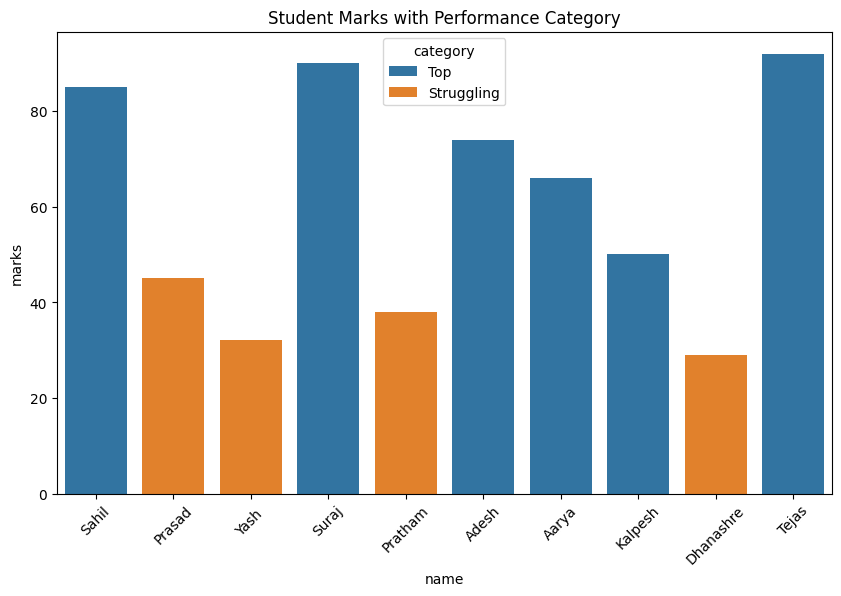

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='name', y='marks', hue='category')
plt.title("Student Marks with Performance Category")
plt.xticks(rotation=45)
plt.show()


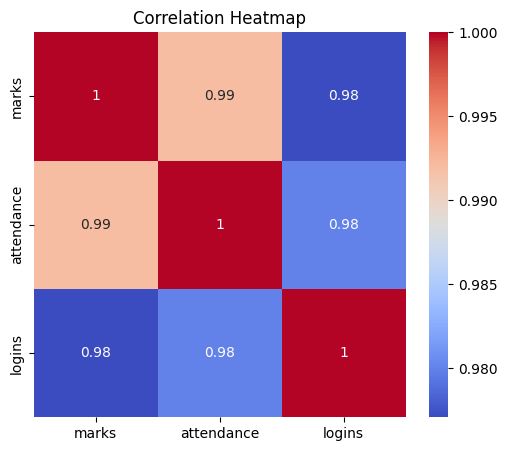

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['marks', 'attendance', 'logins']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


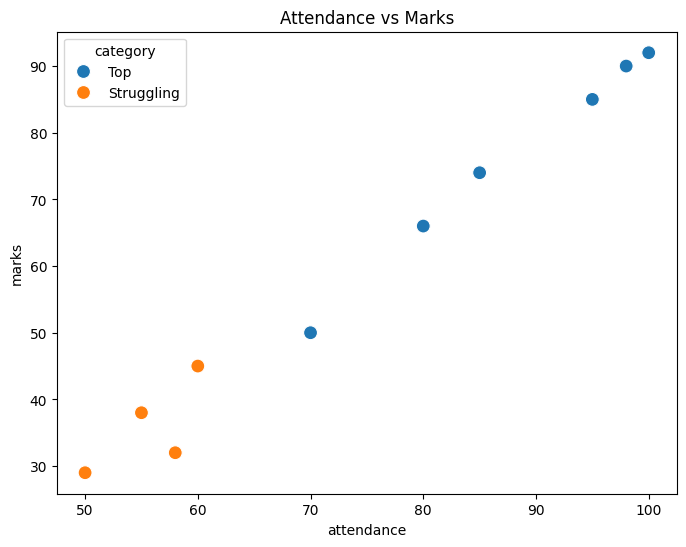

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='attendance', y='marks', hue='category', s=100)
plt.title("Attendance vs Marks")
plt.show()


In [12]:
at_risk = df[df['category'] == 'Struggling']
at_risk.to_excel("at_risk_students.xlsx", index=False)
